## Introduction: digital versus analogic signal


An analog signal is continuous and can take any value over time, representing real-world phenomena like sound or brain activity. A digital signal, by contrast, is discrete, represented in binary (0s and 1s), making it easier for computers to process. In neuroscience, brain signals (e.g., EEG, EMG) are analog, but to analyze, store, or model these signals with computers, we must convert them to digital form. This process—analog-to-digital conversion—enables precise signal processing, data storage, and integration with computational tools for better understanding brain function.
Converting an analog signal to digital involves several key steps: Sampling, 
1.	**Sampling**: The continuous analog signal is measured at regular intervals (sample rate). This captures discrete points in time. The sample rate must be high enough (according to the Nyquist theorem) to avoid loss of information.Higher sample rates capture more detail of the signal, increasing the accuracy of the digital representation. However, higher rates also result in larger data files and more processing power requirements. In neuroscience, determining the correct sample rate depends on the nature of the signal. For EEG (brain activity), a sample rate of 500–1000 Hz is typical, whereas for neuron’s spikes activity it can range from 10’000 to 30’000 Hz.

2.	**Quantization**: Each sampled point is assigned a numerical value based on its amplitude. This step rounds the analog signal to a set of discrete levels.
3.	**Encoding**: The quantized values are then converted into binary format (0s and 1s), which computers can process.
These steps result in a digital approximation of the original analog signal, suitable for further analysis and processing in neuroscience.

<img style="float: center;" src="figures/ad_conversion.png">

## Correlation

Correlation and convolution are very much alike. The following figure from [Convolution | Wikipedia](https://en.wikipedia.org/wiki/Convolution) demonstrates what happens when we convolve two signals and how that can be contrasted to calculating the cross-correlation between them.

<img style="float: center;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/400px-Comparison_convolution_correlation.svg.png">


## Auto-correlation

For this part of the tutorial, we will calculate the auto-correlation of a (random) signal. Let's start by creating the random signal and visualizing it.

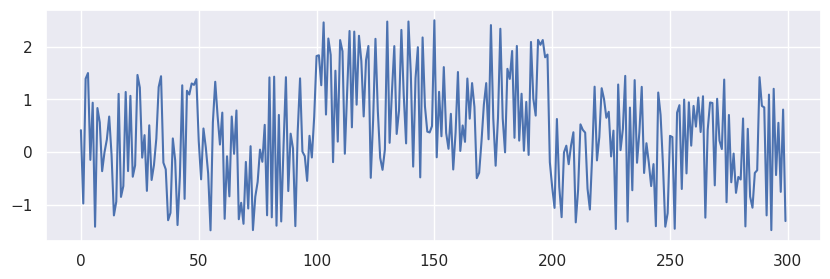

In [2]:
# Auto-correlation, step #1: create a signal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

X = range(0,300)

Y = np.zeros(300)
Y[100:200] = 1
Y += np.random.uniform(-1,1,len(X))*1.5 # Try to play with level of noise

plt.figure(figsize=(10,3))

#TODO: using matplotlib or seaborn plot Y over X
# for visual aspect, the dimension of your figues must be height: 3cm, and width: 10cm
plt.plot(X,Y)
plt.show()

Great! Now that we have a signal to play with, we will use the built-in _correlate_ function from the module NumPy to calculate the correlation of the signal Y with itself.

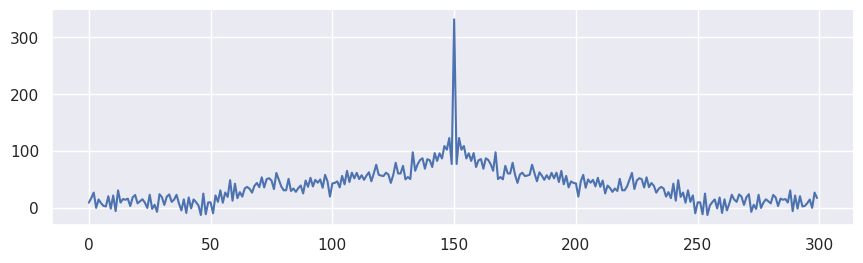

In [3]:
# Calculate auto-correlation of Y

# compute the auto-correlation of Y using the numpy function. (hint use mode='same')
C = np.correlate(Y,Y , mode="same")

sns.relplot(x=X,y=C,kind="line", height=3, aspect = 3)

The above gives us some insight into how the auto-correlation of a signal looks like. But to understand the algorithm in depth, let's make a new signal, one that is deterministic and much simpler.

### Example : Step function without noise.

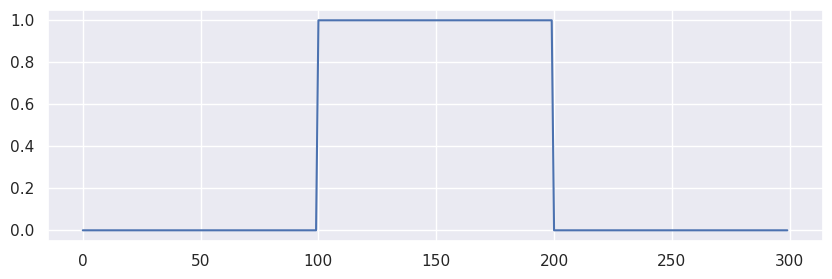

In [4]:
X = range(0,300)

#TODO: creat a step function Y, of same length than X, that has a zero value between 0 to 100 and 200 and 300 ...
#and a value of one between 200 end 300
Y = np.zeros(300)
Y[100:200] = 1

plt.figure(figsize=(10,3))
plt.plot(X,Y);

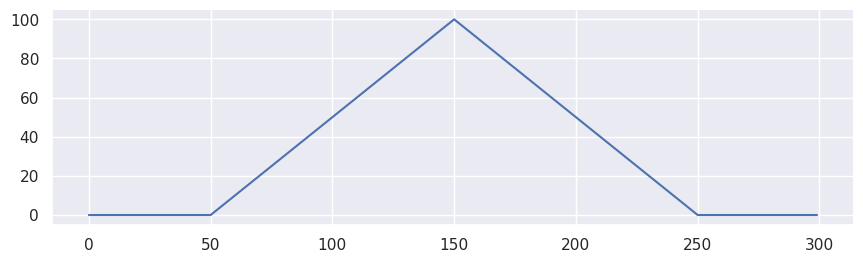

In [5]:
#TODO: Calculate and plot auto-correlation of Y
C = np.correlate(Y,Y , mode="same")

sns.relplot(x=X,y=C,kind="line", height=3, aspect = 3)

Sinusoidal wave with noise

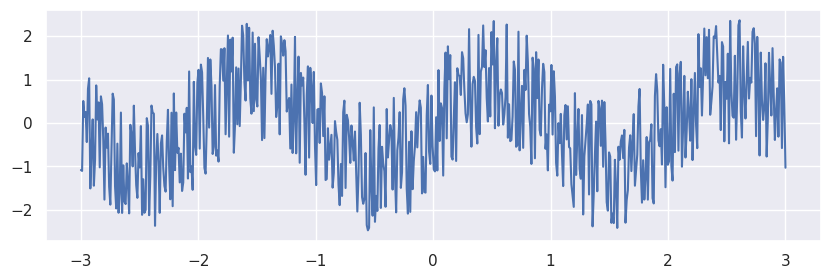

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-3,3,600)

Y = np.sin(np.pi*X)# try a sinusoidal function

#TODO: Add noise to the sinusoidal signal (hint: use numpy function np.rando, and give a uniform noise between -1 and +1
Y += np.random.uniform(-1,1,len(X))*1.5 # Try to play with level of noise

plt.figure(figsize=(10,3))
plt.plot(X,Y);

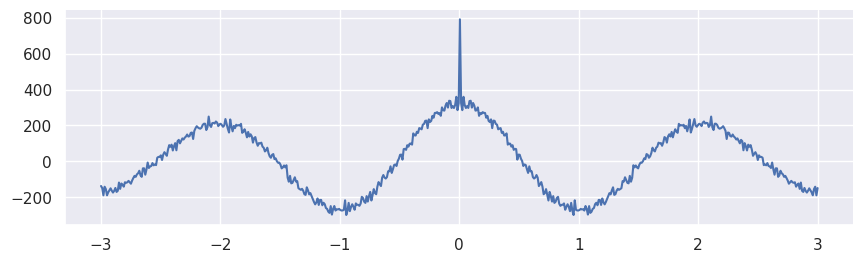

In [7]:
#TODO: Calculate auto-correlation of Y
C = np.correlate(Y,Y , mode="same")


#TODO: plot the autocorrelation
sns.relplot(x=X,y=C,kind="line", height=3, aspect = 3)

This looks much better! What can you see? Is this what you expected to see?

### Fourier Transform

Next, we will see the Fourier Transform and some of its applications in signal processing.


#### Formal definition


The Fourier transform can be defined for signals which are

* discrete or continuous in time, and
* finite or infinite in duration.


This results in four cases. As you might expect, the frequency domain has the same cases:

* discrete or continuous in frequency, and
* finite or infinite in bandwidth.

When time is discrete, the frequency axis is finite, and vice versa. The four cases of the Fourier transform are listed below:

<img style="float: center;" src="https://www.dsprelated.com/josimages_new/sasp2/img88.png">

In all four cases, the Fourier transform can be interpreted as the inner product of the signal $ x$ with a complex sinusoid at radian frequency $ \omega$, denoted as $ s_\omega$. The sinusoid is appropriately adapted for each case:


<img style="float: center;" src="https://www.dsprelated.com/josimages_new/sasp2/img92.png">

#### Implementations

The DFT transforms N discrete-time samples to the same number of discrete frequency samples, and is defined as:

$$
X(k)=\sum_{n=0}^{N−1}x[n]e^{−i \frac{2 \pi n k}{N}}
$$

The discrete Fourier transform (DFT) is the primary transform used for numerical computation in digital signal processing. It is very widely used for spectrum analysis, fast convolution, and many other applications. It can be computed using the [fast Fourier transform (FFT) | Wikipedia](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm in a very efficient manner. You can also read more information about the implementation of the FFT on the [documentation page of scipy](https://docs.scipy.org/doc/scipy/tutorial/fft.html).

Let's go through some examples of the properties and applications of the FFT.

In [8]:
# Example 1: addition of multiple cosines of different frequencies and amplitudes

# importing fft libraries from scipy
from scipy.fft import fft,fftfreq

# initialization
fs = 500 # sampling frequency, Hz
dt = 1/fs # sampling interval, seconds
T = 1 # duration, seconds
tv = np.linspace(0,T,T*fs+1) # time vector

# cosine parameters
A = np.arange(1,6)[::-1] # amplitudes
f = 10*np.arange(1,6) # frequencies

# creating the signals
y = np.zeros((len(f),len(tv)))


for ii in np.arange(0,5):
    y[ii] = A[ii]*np.cos(2*np.pi*f[ii]*tv)  #5 cos signals with a different amplitude & different frequency
    
y_sum = np.sum(y,axis=0) #summing the 5 signals up

# calculation of the FFT
N = 200 # number of FFT points (length of signal)
Y = fft(y_sum,N) #1-D discrete Fourier Transform
fv = fftfreq(N, dt)[:N//2] # make the frequency vector


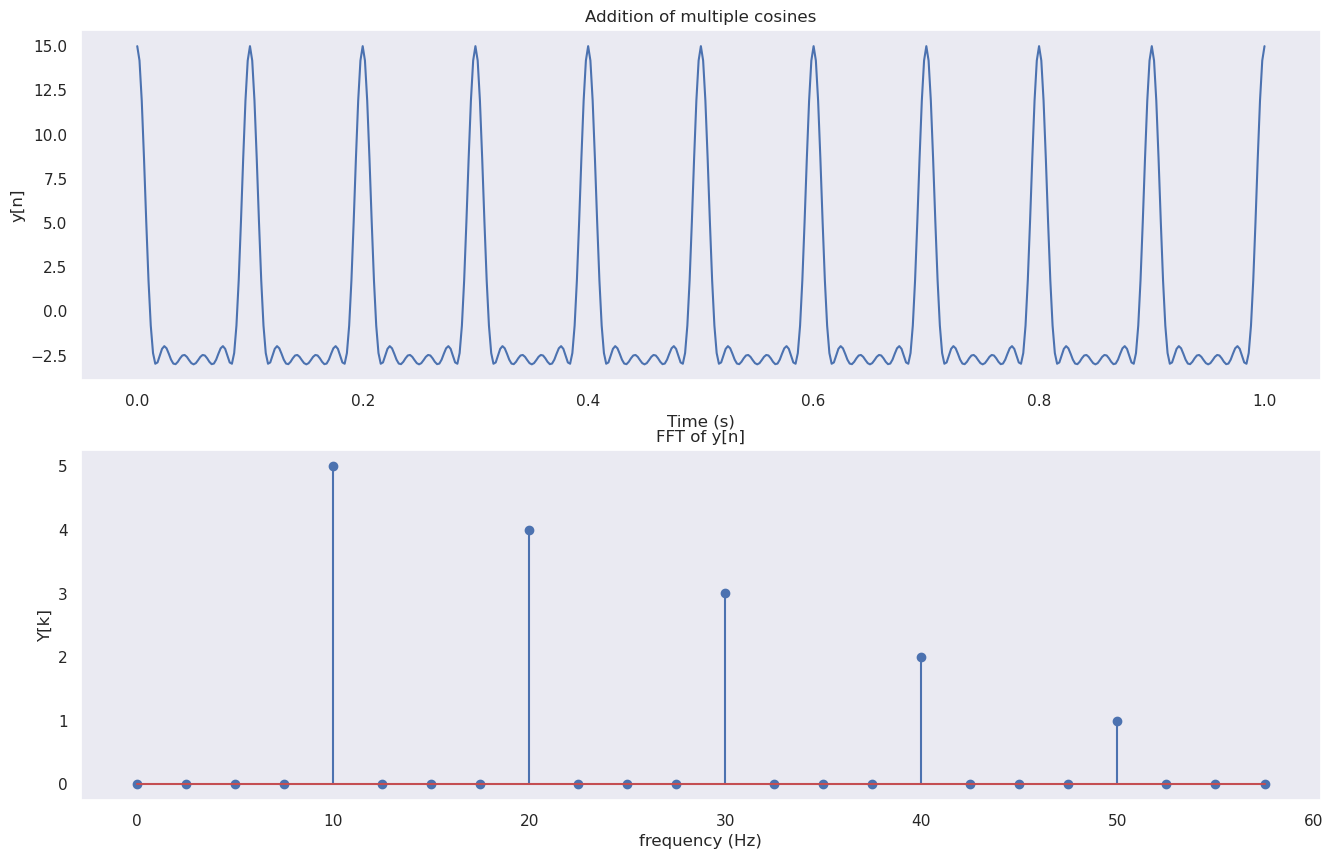

In [9]:
# Let's plot our results
def plot_results(tv, y_sum, Y):
  plt.figure(figsize=(16,10))

  plt.subplot(211)
  plt.plot(tv,y_sum) #plotting the sum across time
  plt.title('Addition of multiple cosines')
  plt.xlabel('Time (s)')
  plt.ylabel('y[n]')
  plt.grid()

  plt.subplot(212)
  plt.stem(fv[:24], 2.0/N * np.abs(Y[:24])) 
  plt.title('FFT of y[n]')
  plt.xlabel('frequency (Hz)')
  plt.ylabel('Y[k]')
  plt.grid()

  plt.show()
plot_results(tv, y_sum, Y)

### Property \#1: Linearity

This property of the Fourier Transform states that:

$$
    \alpha x_1[n] + \beta x_2[n] \buildrel {DFT} \over \longleftrightarrow \alpha X_1[k] + \beta X_2[k]
$$

Let's see this in practice with an example:

In [ ]:
# Property: Linearity of the FFT

# calculation of the FFT for components 1:2
N = 200 # number of FFT points (length of signal)

#TODO: compute Y1 and Y2, the fft of the individual signal y1 and y2
Y1 = ...
Y2 = ...
fv = ... # make the frequency vector

# Let's plot our results
# What do you expect to see?

def plot_2signals_FFT(y = y, Y1 = Y1, Y2 = Y2, fv = fv, N = N):
  plt.figure(figsize=(16,10))

  plt.subplot(211)
  plt.plot(tv,np.sum(y[0:2],axis=0))
  plt.title('Addition of two cosines')
  plt.xlabel('Time (s)')
  plt.ylabel('$y_1[n]+y_2[n]$')
  plt.grid()

  plt.subplot(212)
  (markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y1[:24]),linefmt='b:',markerfmt='bo',label='$Y_1(f)$')
  plt.setp(markerLines, markerfacecolor='none', markeredgecolor='blue', markersize = 12)
  plt.setp(baseLines,linestyle='none')

  (markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y2[:24]),linefmt='r:',markerfmt='ro',label='$Y_2(f)$')
  plt.setp(markerLines, markerfacecolor='none', markeredgecolor='red', markersize = 12)
  plt.setp(baseLines,linestyle='none')

  (markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y1[:24]+Y2[:24]),linefmt='k--',markerfmt='k.',label='$Y_1(f)+Y_2(f)$')
  plt.setp(baseLines,linestyle='none')

  plt.title('Addition of FFTs')
  plt.xlabel('frequency (Hz)')
  plt.ylabel('$Y_1[k] + Y_2[k]$')
  plt.grid()
  plt.legend()

  plt.show()
plot_2signals_FFT()

### Property \#2: Convolution in time domain

This property of the Fourier Transform states that convolution in the time domain is equal to multiplication in the frequency domain:

$$
    f[n]*g[n] \buildrel {DFT} \over \longleftrightarrow F[k]G[k]
$$

Similarly, convolution in the frequency domain is equivalent to multiplication in the time domain.

$$
    F[k]*G[k] \buildrel {iDFT} \over \longleftrightarrow f[n]g[n]
$$

Let's see this in practice with an example:

In [ ]:
# Duration of the time window over which to smooth the signal
twin = 0.025
trange = int(twin*fs)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)

# Plot the Gaussian 
plt.plot(window/fs, gaussian);

**Question**: what happen if you change the value of sigma?

In [ ]:
#TODO: Convolve the Gaussian window (gaussian) with the added sine waves (y_sum). hint: use a numpy function
fr1 = ...
N=500
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

# TODO: Calculate the FFT of the complex convolved result
FR1 = ...

#TODO Calculate the FFT of the complete y signal
Y = 

#TODO Calculate the FFT of the Gaussian window
G = ...

# Plot the results
def plot_conv_fft(y_sum = y_sum, tv = tv, fr1 = fr1):
  plt.figure(figsize=(16,10))
  plt.subplot(311)
  plt.plot(tv, y_sum, color='blue',label='y') # cosines
  plt.plot(tv, fr1, color='red', linestyle='--', linewidth=1,label='y*g') # convolution result
  plt.xlabel('Time (s)')
  plt.ylabel('$y_{c} * g$')
  plt.legend()
  plt.grid()

  plt.subplot(312)
  plt.plot(fv, np.abs(Y[:N//2])/max(np.abs(Y)), label='Y[k]')
  plt.plot(fv, np.abs(G[:N//2])/max(np.abs(G)), 'r--', label='G[k]')
  plt.xlim([0,100])
  plt.legend()
  plt.grid()

  plt.subplot(313)
  plt.plot(fv, np.abs(FR1[:N//2]), label='$FFT\{y*g\}$')
  plt.plot(fv, np.abs(G[:N//2]*Y[:N//2]), 'r:', label='Y[k]*G[k]')
  plt.xlim([0,100])
  plt.xlabel('Frequency (Hz)')
  plt.legend()
  plt.grid()


  plt.show()
plot_conv_fft()

For more information on the properties of the DFT, you can look [here](https://cnx.org/contents/qAa9OhlP@2.44:AePPYjup@5/DFT-Definition-and-Properties)

# Filtering Signals

In this notebook, you will get more familiar with filtering data. In the first part, we will go over some examples of creating signals, combining them, and then applying filters to separate the components.

## Filter Types

Filters are separated into two types: lowpass and highpass. The distinction is based on which frequency band the filters tend to keep. Lowpass filters allow frequencies lower than the cutt-off frequency to pass through, whereas highpass filters perform the opposite operation by allowing frequencies higher than the cut-off frequency and cutting off lower frequencies.

If you want to read more about filter design in analog and digital domains, I highly encourage you to read the free ebook provided here:

[DSPRelated.com - Introduction to Digital Filters](https://www.dsprelated.com/freebooks/filters/)

In [ ]:
# Importing useful libraries:
# NumPy for calculations
# SciPy for filtering operations
# Matplotlib for plotting
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [ ]:
# Let's make some signals, sampled at 1000Hz
fs = 1000    # sampling frequency
dt = 1/fs    # sampling interval
T  = 1       # duration of 1 second
t  = np.linspace(0,1,fs) # time vector

# signal #1 is a sine wave of f1 = 10 Hz and phase of 0 rad
alpha1=0.5
f1 = 10
phi1 = 0
x1 = alpha1*np.sin(2*np.pi*f1*t + phi1)

# signal #2 is a sine wave of f2 = 25 Hz and phase of pi/4 rad
alpha2 = 0.8
f2 = 25
phi2 = np.pi/4
x2 = alpha2*np.sin(2*np.pi*f2*t + phi2)

# signal #3 is a sine wave of f3 = 100 Hz and phase of 3pi/2 rad
alpha3=0.69
f3 = 100
phi3 = 3*np.pi/2
x3 = alpha3*np.sin(2*np.pi*f3*t + phi3)

# signal y is the superposition of all 3 signals
y = x1+x2+x3

#TODO: in a subplot, plot each signal, label them 'X1','X2','X3' and 'X1+X2+X3', set the x limit from 0 to 1 and the y limit to -1 to 1
def plot_signals():
  plt.figure(num=1,figsize=[16,10])
  ...
    
  plt.xlabel('Time (s)')
  plt.show()
plot_signals()

The magenta signal is the superposition of all three signals. As you can see, this signal is erratic and you can't really see the different components that comprise the full signal easily. What we can do, is perform a spectral analysis! So let's plot the FFT of the combined signal.

For more information on the FFT, see the SciPy documentation [here](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#discrete-sine-transforms).

In [ ]:
from scipy.fft import fft,fftfreq

N = len(y) # number of FFT points (length of signal)

Y = fft(y) # calculate the FFT
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

plt.figure(num=4,figsize=[8,7])
plt.plot(fv, 2.0/N * np.abs(Y[0:N//2]))
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Y(f)|')
plt.grid()
plt.show()

Here we go, three distinct peaks, centered at the frequencies of the individual components, with their respective amplitudes. So we can tell that our combined signal $y(t)=x_1(t)+x_2(t)+x_3(t)$ has three frequency components at the frequencies 10, 20, and 100 Hz, with amplitudes of 0.5, 0.8, and 0.69 respectively.

## Filtering the signal

In this section, we will use the SciPy module's function _butter()_ to make our filters. If you would like to learn more about the process, the documentation is provided [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html).


In [ ]:
# Let's define a function for low-pass filtering using a digital Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    fnyq = 0.5 * fs
    normal_cutoff = cutoff / fnyq
    b, a = sig.butter(order, normal_cutoff, btype='low', output='ba', fs=2, analog=False)
    return b, a

# And a second function for high-pass filtering
def butter_highpass(cutoff, fs, order=5):
    fnyq = 0.5 * fs
    normal_cutoff = cutoff / fnyq
    b, a = sig.butter(order, normal_cutoff, btype='high', output='ba', fs=2, analog=False)
    return b, a

# This function filters the input data and returns the filtered sequence
def butter_filter(data, cutoff, fs, order=5, filtype=''):
    if filtype.lower()=='lowpass':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif filtype.lower()=='highpass':
        b, a = butter_highpass(cutoff, fs, order=order)        
        
    y = sig.filtfilt(b, a, data)
    return y




### Lowpass filtering

Now that we've identified the three frequency components of our signal $y(t)$, let's make a filter to cut the 100 Hz frequency out. We will use the following functions:


In [ ]:
# Make a low-pass filter
order = 6
fc = 40  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b,a = butter_lowpass(fc, fs, order) #Numerator (b) and denominator (a) polynomials of the IIR filter. 

# Plot the frequency response.
w, h = sig.freqz(b, a, worN=8000)
plt.figure(figsize=(16,8))

plt.subplot(311)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter the data, and plot both the original and filtered signals.
yf = butter_filter(y, fc, fs, order, 'lowpass')

plt.subplot(312)
plt.plot(t, y, 'b-', label='data')
plt.plot(t, yf, 'r-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.xlim([0,1])
plt.grid()
plt.legend()

# Let's calculate the FFT of the filtered signal and plot the frequency components
N = len(yf) # number of FFT points (length of signal)

Yf = fft(yf) # calculate the FFT
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

plt.subplot(313)
plt.plot(fv, 2.0/N * np.abs(Yf[0:N//2]))
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Y(f)|')
plt.grid()

plt.subplots_adjust(hspace=0.75)
plt.show()

The first figure shows the frequency response of the $6^{th}$ order lowpass Butterworth filter. At 100Hz, the filter completely attenuates the unwanted frequency, as shown in the third figure. The middle panel shows the comparison of the unfiltered signal (in <span style="color:blue">blue</span>) while the filtered version is shown in <span style="color:red">red</span>.


### Highpass filtering

Let's do the opposite: let's remove all frequencies _below_ 100 Hz. As an exercise, fill in the missing code in the cell below:

In [ ]:
# Make a high-pass filter
order = 6
fc = 

# Get the filter coefficients so we can check its frequency response.
b,a = ...#FILL IN;

# Plot the frequency response.
w, h = ... #FILL IN;  sig.freqz(b, a, worN=8000)

plt.figure(figsize=(16,8))
plt.subplot(311)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter the data, and plot both the original and filtered signals.
yf = ... #FILL IN 

plt.subplot(312)
plt.plot(t, y, 'b-', label='data')
plt.plot(t, yf, 'r-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.xlim([0,1])
plt.grid()
plt.legend()

# Let's calculate the FFT of the filtered signal and plot the frequency components
N = len(yf) # number of FFT points (length of signal)

Yf = ... #FILL IN
fv = ... #FILL IN

plt.subplot(313)
plt.plot(fv, 2.0/N * np.abs(Yf[0:N//2]))
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Y(f)|')
plt.grid()

plt.subplots_adjust(hspace=0.75)
plt.show()


What can you say about the filtered signal? 

Describe the frequency spectrum.

Is it what you expected and why ?

